# NLP Assignment
Vishrut Singhal

In [1]:
##Importing the required libraries
import numpy as np
import pandas as pd

In [2]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
from nltk import word_tokenize
from keras.preprocessing import text
from nltk.util import ngrams

In [4]:
##Read the dataset
df= pd.read_parquet('./query_result_2000.993493Z.parquet', engine= 'pyarrow')

In [5]:
df.head()

,title,paragraph,news_list,event_timestamp
0,Will the Covid-19 Grinch cancel a Santa rally ...,OPINION: Stock markets typically trade higher ...,"[""Supplier Market""]",2021-12-20T12:34:00Z
1,SPDR S&P XOP ETF In A Multi-Year Uptrend; Buy ...,SPDR S&P Oil & Gas Exploration & Production ET...,"[""Financial Health""]",2021-12-20T12:31:00Z
2,"Britain reports 10,000 new Omicron cases, ‘maj...",The total number of Omicron cases recorded acr...,"[""Environmental""]",2021-12-20T12:31:00Z
3,Risk aversion sentiment continues to percolate,- Risk aversion sentiment on rapid spread of t...,"[""Commodities""]",2021-12-20T12:30:00Z
4,Omicron rush on boosters may make it harder to...,Countries are saying three vaccine doses are n...,"[""Commodities""]",2021-12-20T12:16:00Z


<a id="2"></a>

<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Basic EDA </h1>

In [6]:
df.news_list.value_counts()

["Environmental"]       545
["Commodities"]         506
["Delays"]              365
["Financial Health"]    303
["Compliance"]          160
["Supplier Market"]     121
Name: news_list, dtype: int64

In [7]:
df.paragraph =df.paragraph.str.lower()

#Remove twitter handlers
df.paragraph = df.paragraph.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.paragraph = df.paragraph.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
df.paragraph = df.paragraph.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters & numerical terms
df.paragraph = df.paragraph.apply(lambda x:' '.join(re.findall(r'\w+', x)))   
df.paragraph = df.paragraph.apply(lambda x:re.sub(r'[0-9]', '', x))

#remove all single characters
df.paragraph = df.paragraph.apply(lambda x:re.sub(r'\s+[a-zA-Z],[0-9]\s+', '', x))

# Substituting multiple spaces with single space
df.paragraph = df.paragraph.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

df.paragraph = df.paragraph.apply(lambda x:re.sub(r'^RT[\s]+', '', x))


In [8]:
df.shape

(2000, 4)

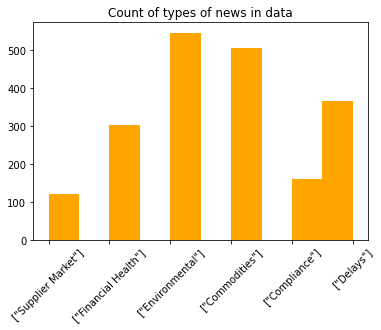

In [9]:
plt.hist(df['news_list'], color= 'orange',label=True)
plt.title('Count of types of news in data')
plt.xticks(rotation=45)
plt.show()

In [10]:
tokenized_word=word_tokenize(' '.join(df.paragraph))
#print(tokenized_word)

In [11]:
from wordcloud import WordCloud,STOPWORDS

In [12]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
#print(stop_words)
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)


In [13]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_sent)
print(fdist)

<FreqDist with 6650 samples and 46136 outcomes>


In [14]:
ds= fdist.most_common(20)
ds= pd.DataFrame(ds)

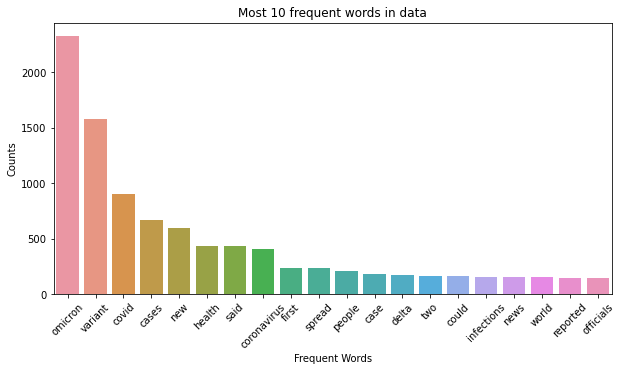

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x= ds[0], y=ds[1])
plt.title('Most 10 frequent words in data')
plt.xticks(rotation=45)
plt.xlabel('Frequent Words')
plt.ylabel('Counts')
plt.show()

From the above plot we can get that the data indicating the high surge of cases of omicron variant worldwide. 

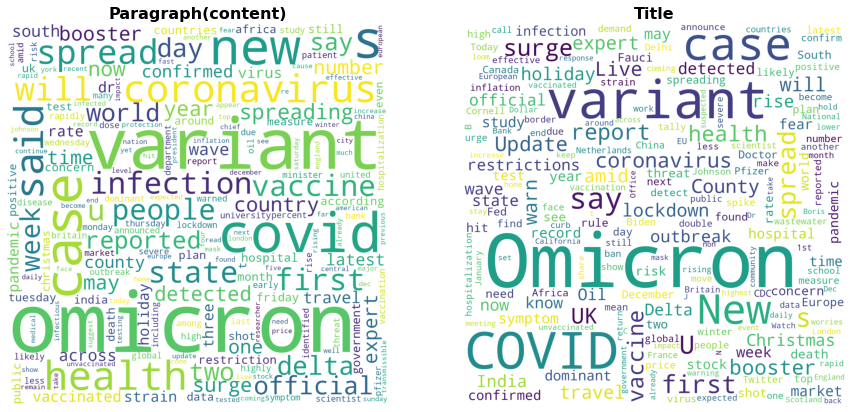

In [16]:
##Words distribution in data 
n= WordCloud(width=1500,height=1500,collocations = False,background_color='white').generate(" ".join(df.paragraph))
k= WordCloud(width=1500,height=1500,collocations = False,background_color='white').generate(" ".join(df.title))
#plt.imshow(n)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Paragraph(content)',fontsize=16,fontweight='bold')
plt.imshow(n)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Title',fontsize=16,fontweight='bold')
#plt.figure(figsize=(5,5))
plt.imshow(k)
plt.axis('off')

plt.show()

We can see in Title wordcloud, mostly article headlines indicating the fear of restrictions over the travel, sales, production in the different countries. Moreover, in content the reason stated is high surge in cases of Omicron variant. Therefore we can say that will going to affect many countries supply chain in recent future. 

In [17]:
labels= df.news_list.unique()

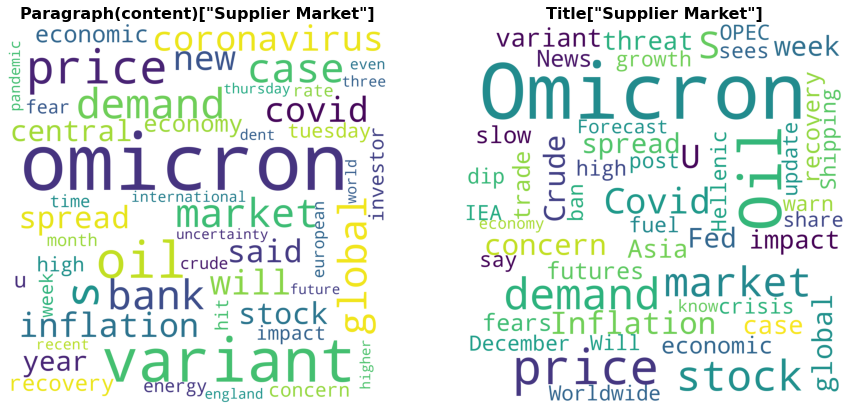

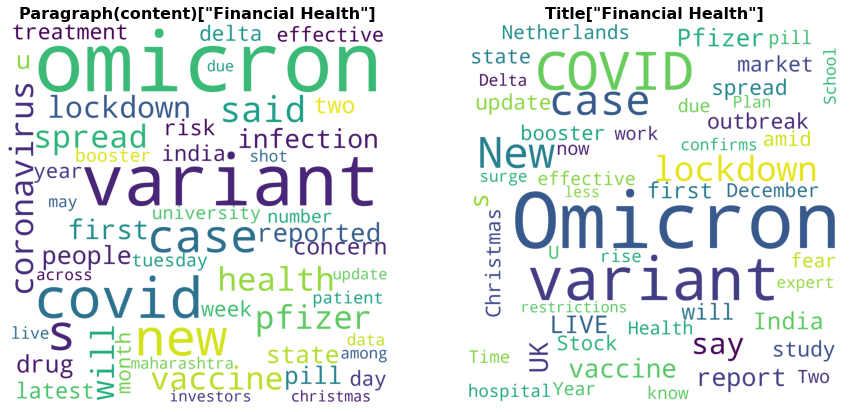

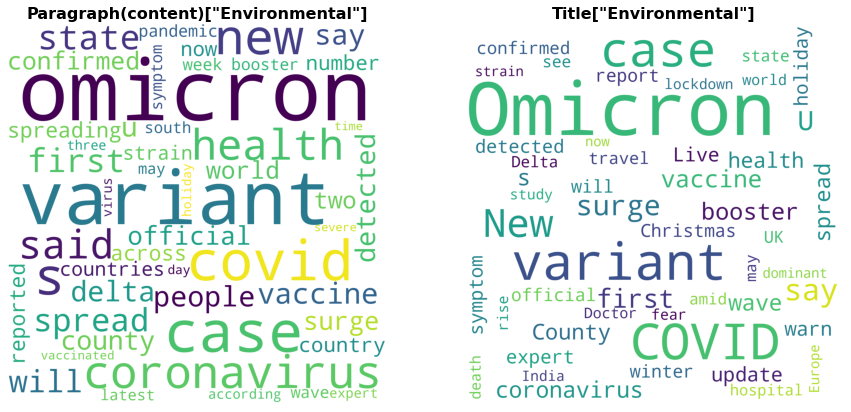

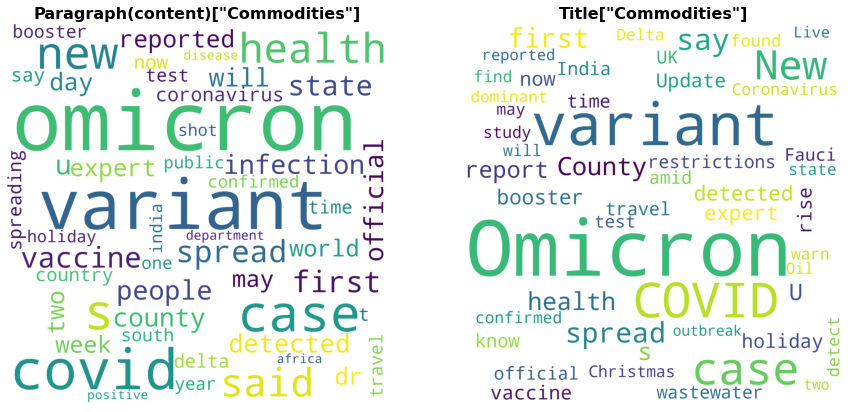

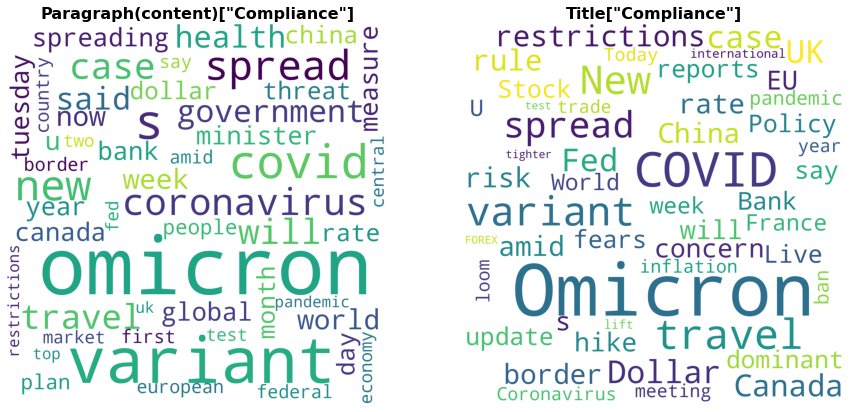

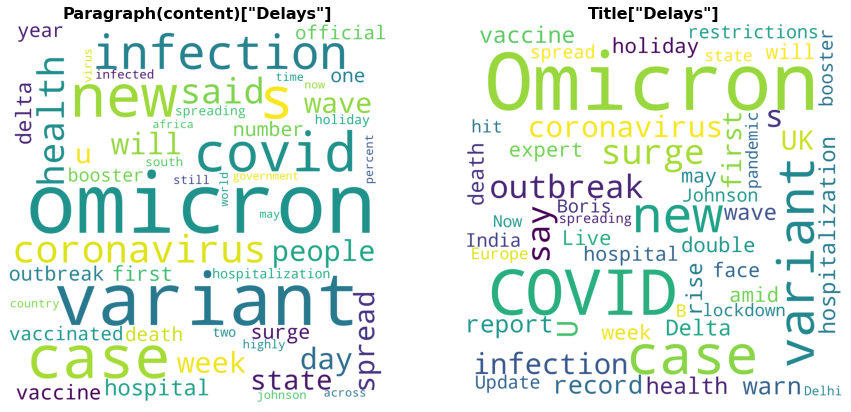

In [18]:
%matplotlib inline
for i in labels:
    np= df[df['news_list']==i]
    n= WordCloud(max_words=50,width=1500,height=1500,collocations = False,background_color='white').generate(" ".join(np.paragraph))
    k= WordCloud(max_words=50,width=1500,height=1500,collocations = False,background_color='white').generate(" ".join(np.title))
    #plt.title(i)
    #plt.imshow(n)
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.title('Paragraph(content)'+ i,fontsize=16,fontweight='bold')
    plt.imshow(n)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('Title'+i,fontsize=16,fontweight='bold')
#plt.figure(figsize=(5,5))
    plt.imshow(k)
    plt.axis('off')

    plt.show()

# In the above plots is discriminate the plots on the basis of news list.

Now if we look the graphs of Supplier Market it indicates the price in oil, fuel and in differnt products of market. Also, it showing the demand will increase worldwide.

In the Financial Health articles titles indicating the name of many countries going to be again start lockdown in their work, school and travel because of highly spread of omicron on the christmans occasion, according to content. 

In the Environment section variant is detected worldwide and everyone trying to take expert advice since no vaible solution is available right now.

In the compliance section states are impling the restrictions that will directly affect the trade .



In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

## Sentiment analysis using VADER technique


In [20]:
sid = SIA()
df['sentiments']           = df['title'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
df['Positive Sentiment']   = df['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
df['Negative Sentiment']   = df['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

df.drop(columns=['sentiments'],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is depr

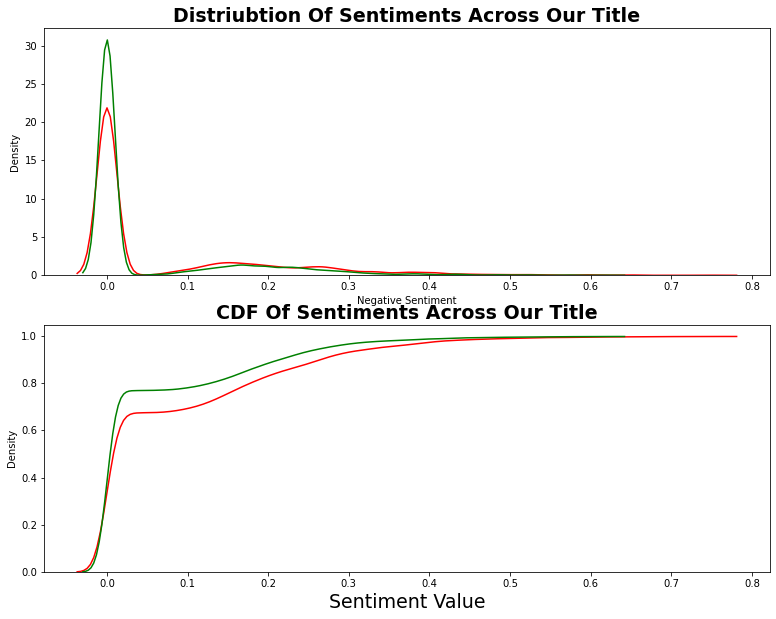

In [21]:
plt.figure(figsize=(13,10))
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Title',fontsize=19,fontweight='bold')
sns.kdeplot(df['Negative Sentiment'],bw=0.1,color='red')
sns.kdeplot(df['Positive Sentiment'],bw=0.1,color='green')
#sns.kdeplot(df['Neutral Sentiment'],bw=0.1,color='brown')
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Title',fontsize=19,fontweight='bold')
sns.kdeplot(df['Negative Sentiment'],bw=0.1,cumulative=True,color='red')
sns.kdeplot(df['Positive Sentiment'],bw=0.1,cumulative=True,color='green')
#sns.kdeplot(df['Neutral Sentiment'],bw=0.1,cumulative=True,color='brown')
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

In [22]:
#Sorting And Feature Engineering
df = df.sort_values(by='event_timestamp')
ft_data= df.copy()
ft_data['date'] = pd.to_datetime(df['event_timestamp']).dt.date

ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

In [23]:
Most_Positive = ft_data[ft_data['Positive Sentiment'].between(0.4,1)]
Most_Negative = ft_data[ft_data['Negative Sentiment'].between(0.25,1)]

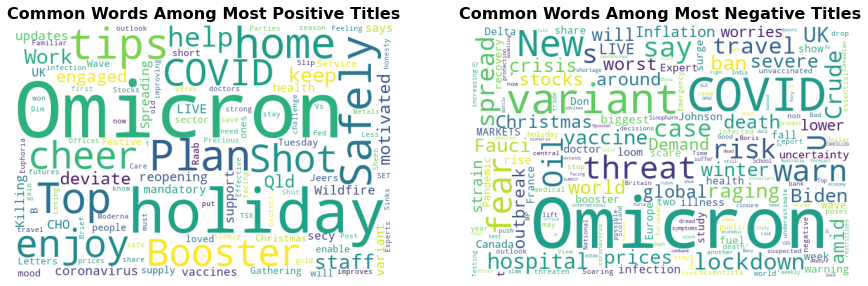

In [24]:
Most_Positive_text = ' '.join(Most_Positive.title)
Most_Negative_text = ' '.join(Most_Negative.title)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Titles',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Titles',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

Now check the Data by date wise

In [25]:
ft_data['date'].value_counts()

2021-12-15    342
2021-12-16    317
2021-12-17    311
2021-12-14    300
2021-12-18    284
2021-12-19    279
2021-12-20    167
Name: date, dtype: int64

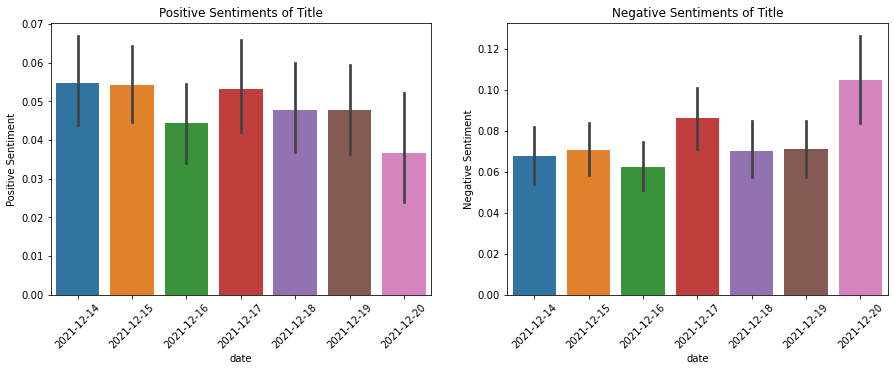

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Positive Sentiments of Title')
sns.barplot(y= ft_data['Positive Sentiment'], x= ft_data['date'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Negative Sentiments of Title')
sns.barplot(x= ft_data['date'], y=ft_data['Negative Sentiment'])
plt.xticks(rotation=45)
plt.show()

In the above plots positive sentiments is decreasing over the time and negative sentiments are increasing over the time. That means as the date increasing variant is increasing worldwide and affect the trade. 

In [27]:
sid = SIA()
ft_data['sentimentspara']           = ft_data['paragraph'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
ft_data['Positive Sentiment para']   = ft_data['sentimentspara'].apply(lambda x: x['pos']+1*(10**-6)) 
#df['Neutral Sentiment']    = df['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
ft_data['Negative Sentiment para']   = ft_data['sentimentspara'].apply(lambda x: x['neg']+1*(10**-6))

ft_data.drop(columns=['sentimentspara'],inplace=True)

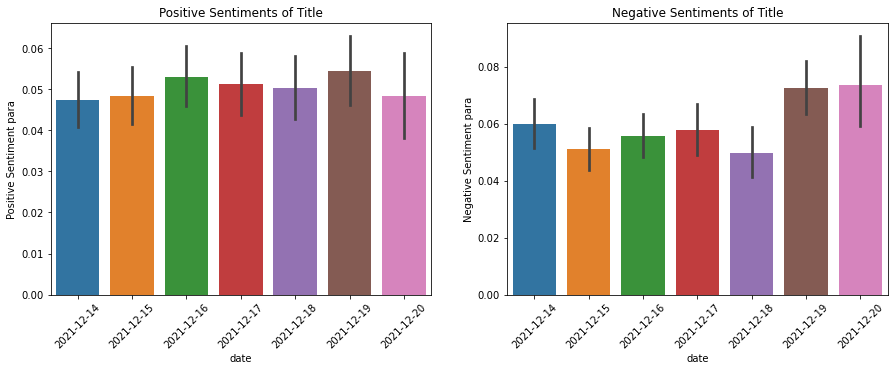

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Positive Sentiments of Title')
sns.barplot(y= ft_data['Positive Sentiment para'], x= ft_data['date'])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('Negative Sentiments of Title')
sns.barplot(x= ft_data['date'], y=ft_data['Negative Sentiment para'])
plt.xticks(rotation=45)
plt.show()

The same flow we can see in the content as well. 

In [29]:
Most_Positive_para= ft_data[ft_data['Positive Sentiment para'].between(0.4,1)]
Most_Negative_para= ft_data[ft_data['Negative Sentiment para'].between(0.25,1)]

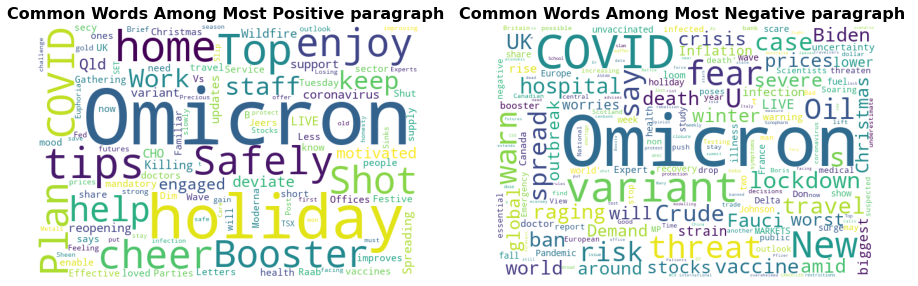

In [30]:
pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive paragraph ',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative paragraph ',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

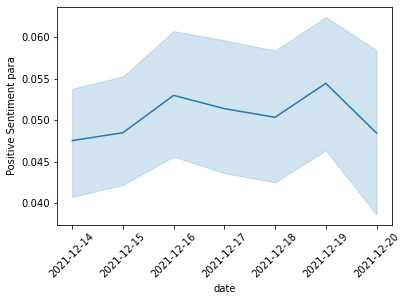

In [31]:
sns.lineplot(y= ft_data['Positive Sentiment para'],x= ft_data['date'])
plt.xticks(rotation=45)
plt.show()

In [32]:
import datetime

# Now check the data of 20 Dec, since this day we have highest negative sentiments

In [33]:
jk= ft_data[ft_data['date']==datetime.date(2021,12,20)]

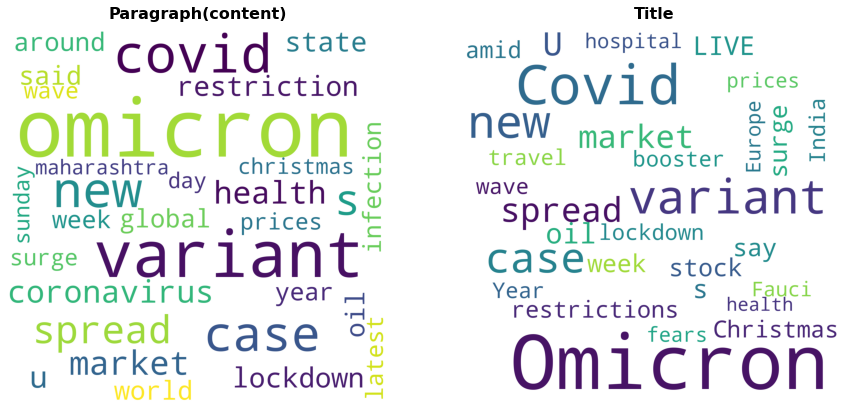

In [34]:
n1= WordCloud(max_words=30,width=1500,height=1500,collocations = False,background_color='white').generate(" ".join(jk.paragraph))
k1= WordCloud(max_words=30, width=1500,height=1500,collocations = False,background_color='white').generate(" ".join(jk.title))
#plt.imshow(n)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Paragraph(content)',fontsize=16,fontweight='bold')
plt.imshow(n1)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Title',fontsize=16,fontweight='bold')
#plt.figure(figsize=(5,5))
plt.imshow(k1)
plt.axis('off')

plt.show()

On the 20 th of december articles are stating the surge in price hike of oil prices amid of Christmas and travel will also affect the market. Alos, restrictions will impose globally.

In [35]:
Most_Positive = jk[jk['Positive Sentiment'].between(0.4,1)]
Most_Negative = jk[jk['Negative Sentiment'].between(0.25,1)]

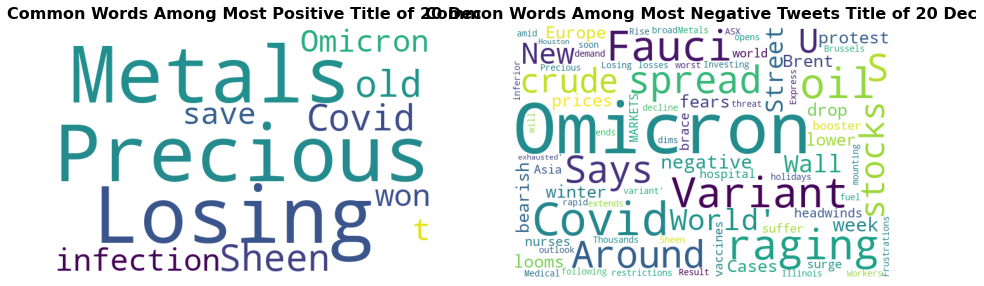

In [36]:
Most_Positive_text = ' '.join(Most_Positive.title)
Most_Negative_text = ' '.join(Most_Negative.title)


pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(Most_Positive_text)
nwc = WordCloud(max_words=80,width=600,height=400,collocations = False,background_color='white').generate(Most_Negative_text)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Title of 20 Dec',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets Title of 20 Dec',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

The Above wordcloud conforming us that The above insights will affect the market since they occur in the negative clouds of data.

# Now look at the names of Countries occur in most negative titles

In [37]:
import pycountry
paragraph= (' '.join(Most_Negative.title))
for country in pycountry.countries:
    if country.name in paragraph:
        print(country.name)

Canada
Israel


Apart from that CBOW methoad can also be useful in this type of problems. Because if identies the most related words with the particular word. Therefore we can identify the words related to particular country and market that will also gie us insight of the domain. 

Association is also one the method we can use for finding the association between the top words. That we can use to identify the port names and related words and particular market name and related word.

In [38]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(df['title'])
word2id = tokenizer.word_index
word2id

{'omicron': 1,
 'in': 2,
 'variant': 3,
 'covid': 4,
 'to': 5,
 'of': 6,
 'the': 7,
 'cases': 8,
 '19': 9,
 'as': 10,
 'new': 11,
 'for': 12,
 'and': 13,
 'is': 14,
 'on': 15,
 'a': 16,
 'says': 17,
 'news': 18,
 'case': 19,
 'first': 20,
 'be': 21,
 'what': 22,
 'health': 23,
 'surge': 24,
 'with': 25,
 'against': 26,
 'uk': 27,
 'coronavirus': 28,
 'reports': 29,
 'spread': 30,
 'live': 31,
 'more': 32,
 'from': 33,
 'will': 34,
 'could': 35,
 'at': 36,
 'amid': 37,
 'us': 38,
 'travel': 39,
 'county': 40,
 'about': 41,
 'by': 42,
 'are': 43,
 'over': 44,
 'updates': 45,
 'christmas': 46,
 'u': 47,
 'now': 48,
 'oil': 49,
 'detected': 50,
 'lockdown': 51,
 'know': 52,
 'delta': 53,
 'outbreak': 54,
 'booster': 55,
 'restrictions': 56,
 'how': 57,
 'wave': 58,
 'rise': 59,
 'but': 60,
 'vaccines': 61,
 'may': 62,
 'experts': 63,
 's': 64,
 'warns': 65,
 'study': 66,
 'vaccine': 67,
 'india': 68,
 'spreads': 69,
 'after': 70,
 'dominant': 71,
 'it': 72,
 'holiday': 73,
 'you': 74,
 'sy

In [39]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

In [40]:
wkd= list(word2id)
len(wkd)

3954

In [41]:
# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in wkd]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 3955
Vocabulary Sample: [('omicron', 1), ('in', 2), ('variant', 3), ('covid', 4), ('to', 5), ('of', 6), ('the', 7), ('cases', 8), ('19', 9), ('as', 10)]


In [42]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='adam')

# view model summary
print(cbow.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            395500    
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3955)              399455    
                                                                 
 dense_1 (Dense)             (None, 3955)              15645980  
                                                                 
Total params: 16,440,935
Trainable params: 16,440,935
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1
#{"mode":"full","isActive":False}

In [44]:
for epoch in range(0, 2):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 0 	Loss: 35916.03067779541

Epoch: 1 	Loss: 33894.83803510666



In [45]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()


(3954, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
in,0.010028,-0.046948,0.010196,-0.035443,-0.042825,0.003565,0.019735,-0.012562,0.038632,-0.006964,...,-0.030571,-0.025837,-0.031835,0.047634,-0.009212,0.028427,-0.009745,-0.043162,-0.047707,0.048006
variant,-0.027724,0.031806,0.027286,0.042870,-0.023295,0.015601,0.017432,0.046404,-0.042717,-0.015316,...,-0.010490,0.020757,0.038901,0.023470,0.031931,0.024476,-0.005399,0.049651,0.039485,-0.047454
covid,-0.009654,-0.022082,0.006980,0.005796,-0.012758,0.039087,-0.038284,-0.046092,0.011145,-0.032032,...,0.033935,-0.037833,-0.034267,0.011009,-0.035841,0.025340,-0.003228,0.001371,-0.004922,0.027769
to,-0.036915,-0.036298,0.013313,-0.023764,0.036681,0.013411,-0.018944,-0.026284,0.009072,-0.027255,...,-0.023479,0.000059,-0.006217,-0.013295,-0.013294,-0.024643,-0.028562,0.023523,0.006333,-0.029342
of,0.012118,0.020829,-0.030897,-0.031662,-0.012328,-0.006651,0.047138,-0.011390,-0.033959,-0.006606,...,-0.044004,-0.046507,0.003766,-0.035242,-0.035544,0.037099,0.011691,-0.032457,-0.015933,0.044493


In [46]:
from sklearn.metrics.pairwise import cosine_distances

# compute pairwise distance matrix
distance_matrix = cosine_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:20]+1] 
                   for search_term in ['canada',]}
'''
Brazil
Canada
China
Cayman Islands
Germany
Denmark
Algeria
Egypt
Spain
France
Georgia
Ghana
Hong Kong
Indonesia
India
Ireland
Iraq
Israel
Italy
Jersey
Japan
Kenya
Cambodia
Sri Lanka
Mexico
Niger
Nigeria
Netherlands
Norway
New Zealand
Oman
Philippines
Poland
Portugal
Rwanda
Singapore
Sierra Leone
Ukraine
United States
South Africa]}
'''
similar_words

(3954, 3954)


{'canada': ['manufacturing',
  'genesee',
  'nifty',
  'is',
  'higher',
  'starting',
  'threaten',
  'manslaughter',
  'astronomy',
  'h',
  'biopharma',
  'fully',
  'recommend',
  'solutions',
  'heart',
  'rehearsal',
  '01',
  'mount',
  '‘warp']}

In the above words we can see how we can extract the words related to particule country or port. However i need to work on that model since it not giving the much good results but that is also one the idea to get the insights from the huge data.


<a id="2"></a>

<h1 style="background-color:pink;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Modeling </h1>

In [47]:
df['fullcontent'] = df['title'].str.cat(df['paragraph'], sep =" ")

In [48]:
df.fullcontent =df.fullcontent.str.lower()

#Remove twitter handlers
df.fullcontent = df.fullcontent.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
df.fullcontent = df.fullcontent.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
df.fullcontent = df.fullcontent.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters & numerical terms
df.fullcontent = df.fullcontent.apply(lambda x:' '.join(re.findall(r'\w+', x)))   
df.fullcontent = df.fullcontent.apply(lambda x:re.sub(r'[0-9]', '', x))

#remove all single characters
df.fullcontent = df.fullcontent.apply(lambda x:re.sub(r'\s+[a-zA-Z],[0-9]\s+', '', x))

# Substituting multiple spaces with single space
df.fullcontent = df.fullcontent.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

df.fullcontent = df.fullcontent.apply(lambda x:re.sub(r'^RT[\s]+', '', x))


In [49]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['news_list']= label_encoder.fit_transform(df['news_list'])

df['news_list'].unique()


array([0, 3, 4, 2, 5, 1])

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['fullcontent'])

I am going to use the Random forest algorithm to classify the news list. We all know random forest is the ensemble learning method that will create the differnt random trees and give the average accuracy on the basis of different decision trees and works well on complex data. Also, reduce the overfitting situation. 

Now on the problem side we have a text classification problem having a very less variance of words in the data as we saw in the EDA portion. Therefore there is possible chance of overfitting and that is a complex data as well. Therefore i applied the random forest algorithum. 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['news_list'], test_size=0.3, random_state=123)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = RandomForestClassifier().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("RandomForestClassifier Accuracy:",metrics.accuracy_score(y_test, predicted))

RandomForestClassifier Accuracy: 0.5183333333333333


In [53]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.39      0.74      0.51       141
           1       0.75      0.26      0.38        47
           2       0.70      0.46      0.56       109
           3       0.54      0.64      0.58       161
           4       0.67      0.19      0.30       103
           5       0.81      0.56      0.67        39

    accuracy                           0.52       600
   macro avg       0.64      0.47      0.50       600
weighted avg       0.59      0.52      0.50       600



To Evaluate the classififcation model we use the confusion matrix and the parameters defined on the basis of confusion matrix.
Here we have Precision- which elaborates the out of total positives out of them how many are correctly true positives.
Recall-  recall refers to the percentage of total relevant results correctly classified by your algorithm.
F1 Score= It is harmonic mean of recision and recall. 


# Task 2

a). As i get to know about the data we can go with two methods. First one is LDA topic modeling method. This is one of the unsupervised
method that we can use for labeling the data according to the topic. Secondly we can go further by describing the KPI's of the topics
As we know, sports data should have names of sports, players and win-loss words and matrix. In the same way science topics also have
words related to technologies and innovations. Therefore we can move with this idea s well. It may be take more time but yes it is an method. 

b.) To collect such data for the Supply chain problem, We need to extract the data from social media i.e- twitter, News Articles over the internet, Interviews of Key persons related to this market and Mobile comments and reviews can also be useful for our problem. To collect those data from internet we have to use web scrapping technology where we have mutiple libraries, like tweepy, Beauty soup, urllib.  

# Task3

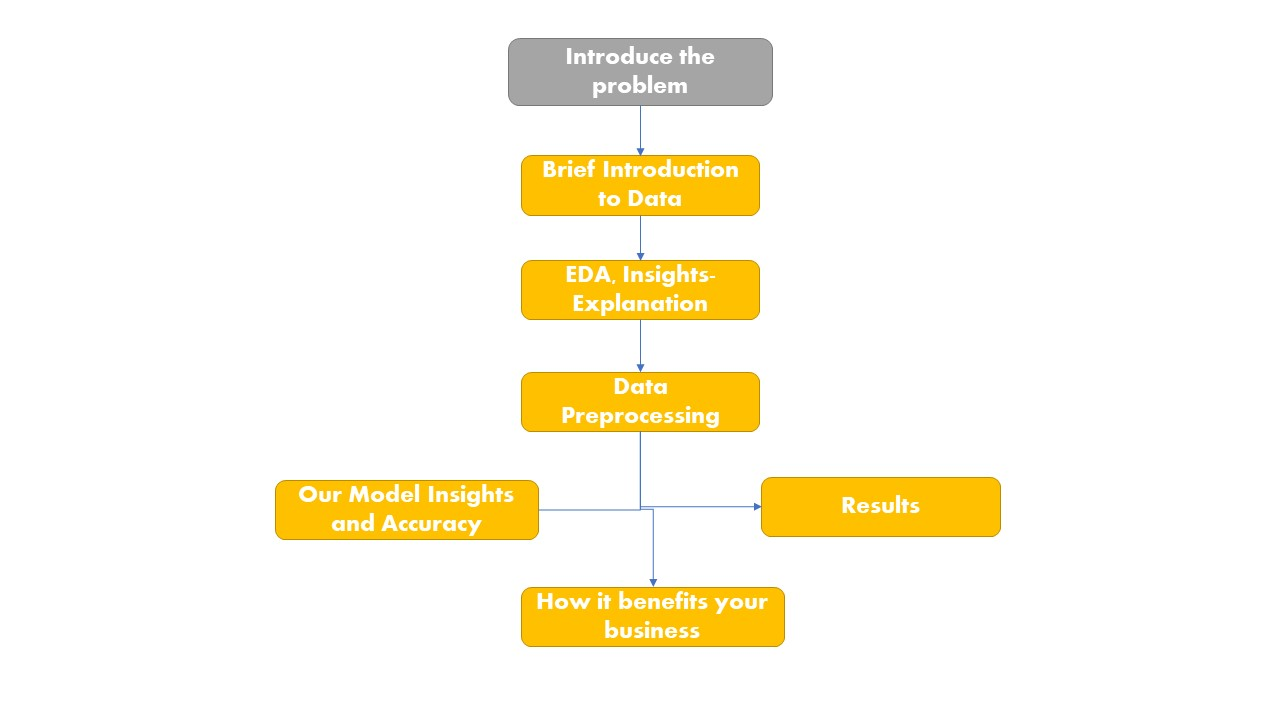

In [54]:
from IPython.display import Image
Image("./Presentation1/Slide1.JPG")

To define our model to the Customers firstly we need to clarify them what problem we are trying to solve or the problem that our product deal with. 
Secondly, need to tell them our resources. What are our data resources and data period. 
Then we have to present our data insights and explaination about thr insights how they are helping to solve the problem. 
Moreover we need to explain the methodology to consider the required data for the model training and the processing we applying on the data to make our product robust. Thereafter, present the model insights, accuracy of the model and the results. Further we need to address the requirement of this model and the solutions that will directly help them in their business.  